<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
folder = '/content/drive/MyDrive/BT AI/100_flower/'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical

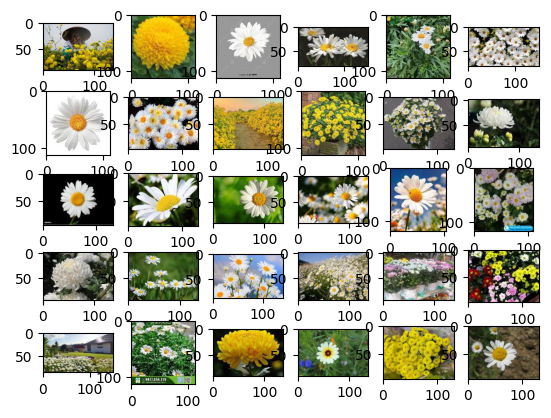

In [ ]:
for i in range(30):
  plt.subplot(5,6,i+1)
  filename = folder + 'Daisy ('+str(i+1)+').jpg'
  img = imread(filename)
  plt.imshow(img)
plt.imshow(img)

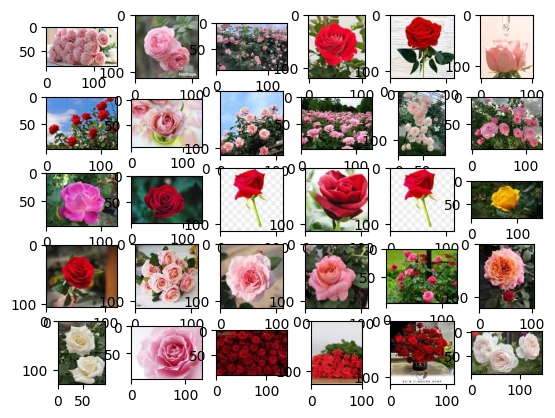

In [ ]:
for i in range(30):
  plt.subplot(5,6,i+1)
  filename = folder + 'Rose ('+str(i+1)+').jpg'
  img = imread(filename)
  plt.imshow(img)
plt.imshow(img)

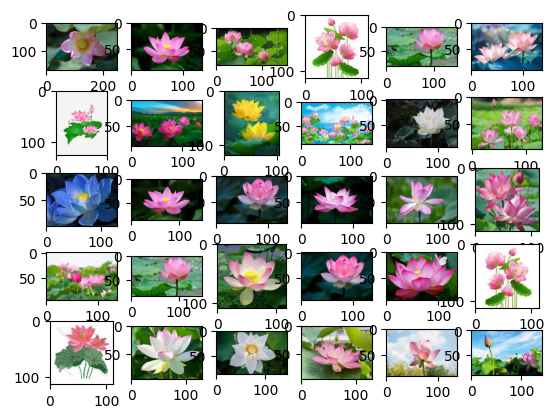

In [ ]:
for i in range(30):
  plt.subplot(5,6,i+1)
  filename = folder + 'Lotus ('+str(i+1)+').jpg'
  img = imread(filename)
  plt.imshow(img)
plt.imshow(img)

In [ ]:
photos, labels = list(), list()
for file in listdir(folder):
  output=0
  if file.startswith ('Apri'):
    output=1
  if file.startswith ('Daisy'):
    output=2
  if file.startswith ('Lotus'):
    output = 3
  if file.startswith ('Rose'):
    output = 4
  if file.startswith ('WL'):
    output = 5
  img =load_img(folder+ file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos =asarray(photos)
labels =asarray(labels)
print(photos.shape,labels.shape)
save('flower_photos.npy',photos)
save('flower_labels.npy',labels)

(452, 30, 40, 3) (452,)


In [ ]:
x_train = np.load('/content/flower_photos.npy')
y_train = np.load('/content/flower_labels.npy')
print(x_train.shape)
print(y_train.shape)

(452, 30, 40, 3)
(452,)


In [ ]:
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,100)

In [ ]:
#32 lần tích chập
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lần tích chập
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lần tích chập
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs = 150,verbose = 1)

Epoch 1/150
8/8 [==============================] - 9s 35ms/step - loss: 3.4474 - accuracy: 0.1394
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 2.1740 - accuracy: 0.2478
Epoch 3/150
8/8 [==============================] - 0s 7ms/step - loss: 2.0253 - accuracy: 0.2389
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 1.8941 - accuracy: 0.2345
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 1.7602 - accuracy: 0.2854
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 1.7139 - accuracy: 0.2987
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 1.6845 - accuracy: 0.3053
Epoch 8/150
8/8 [==============================] - 0s 7ms/step - loss: 1.6049 - accuracy: 0.3363
Epoch 9/150
8/8 [==============================] - 0s 10ms/step - loss: 1.4796 - accuracy: 0.4159
Epoch 10/150
8/8 [==============================] - 0s 7ms/step - loss: 1.3756 - accuracy: 0.4248
Epoch 11/150
8/8 [=========

1/1 [==============================] - 0s 32ms/step


'Rose'

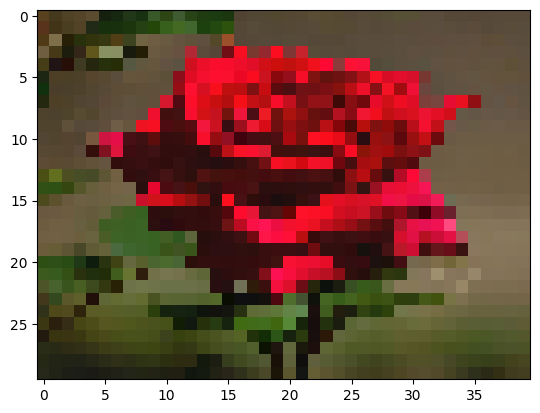

In [ ]:
pred = {1: 'Apri',2:'Daisy', 3:'Lotus', 4:'Rose',5:'WL'}
img = load_img("/content/drive/MyDrive/rose_test.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
pred[result[0]]

1/1 [==============================] - 0s 33ms/step


'Lotus'

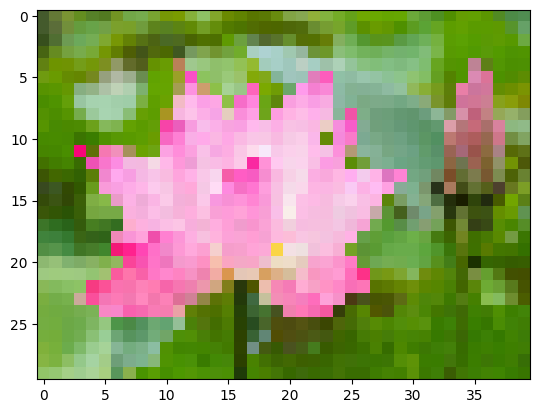

In [ ]:
pred = {1: 'Apri',2:'Daisy', 3:'Lotus', 4:'Rose',5:'WL'}
img = load_img("/content/drive/MyDrive/lotus_test.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
pred[result[0]]

1/1 [==============================] - 0s 31ms/step


'Daisy'

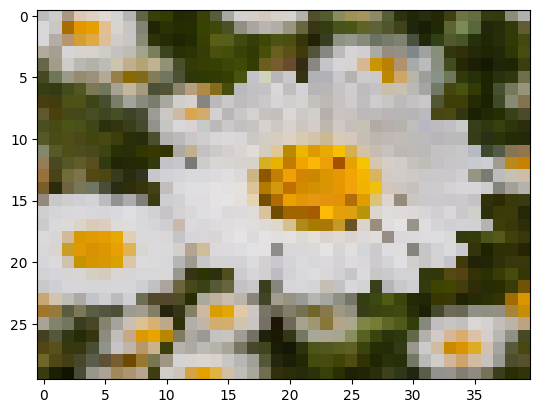

In [ ]:
pred = {1: 'Apri',2:'Daisy', 3:'Lotus', 4:'Rose',5:'WL'}
img = load_img("/content/drive/MyDrive/daisy_test.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
pred[result[0]]

In [ ]:
model.save('/content/drive/MyDrive/Train model/flower_model.h5')